In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path="KNN\Glassidentification\glass.csv"

data = pd.read_csv(path)

print(data)
print(data.info())

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  ----

<AxesSubplot:>

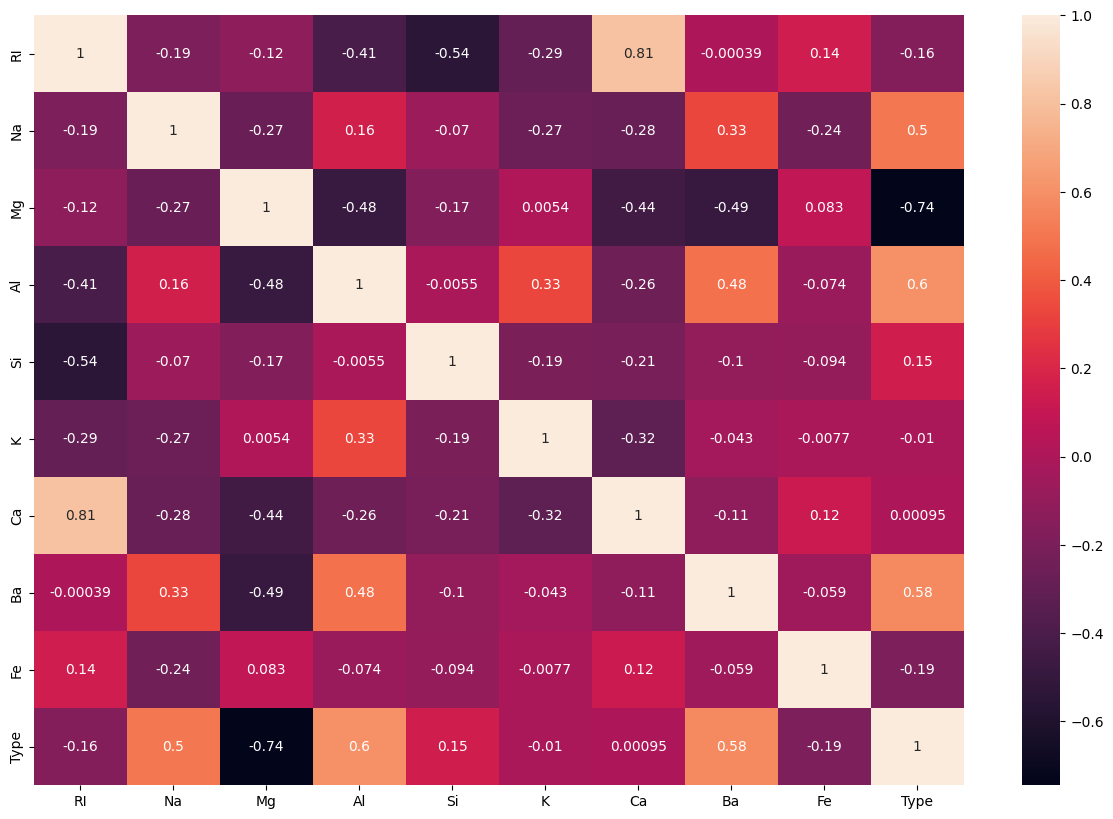

In [3]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [4]:
inputs= data.drop(['Type'],"columns")


#the column userId doesnt add any value to the input output so dont consider it

output= data.drop(['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'],"columns")
print(inputs)
print(output)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
     Type
0       1
1       1
2       1
3       1
4       1
..    ...
209     7
210     7
211     7
212     7
213     7

[214 rows x 1 columns]


C:\Users\Rohan\AppData\Local\Temp\ipykernel_20824\101071121.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputs= data.drop(['Type'],"columns")
C:\Users\Rohan\AppData\Local\Temp\ipykernel_20824\101071121.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  output= data.drop(['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'],"columns")


In [5]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(inputs,output,test_size=0.2)

In [6]:
#implementing standard scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() #initialising the Std scalar

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

model.fit(x_train,y_train) #train the model

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1) 

model.fit(x_train,y_train) #train the model

c:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [8]:
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

[1 1 1 1 7 2 1 2 5 1 7 1 1 2 2 2 7 2 7 7 1 1 5 2 5 1 2 2 6 1 2 2 2 2 1 2 6
 7 6 7 2 1 2]
     Type
136     2
34      1
120     2
156     3
204     7
88      2
27      1
12      1
168     5
81      2
207     7
91      2
26      1
104     2
46      1
94      2
192     7
74      2
182     6
190     7
38      1
149     3
105     2
143     2
201     7
114     2
5       1
140     2
180     6
72      2
142     2
76      2
130     2
160     3
187     7
32      1
109     2
212     7
178     6
195     7
44      1
157     3
150     3


In [9]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)
#Finding accuracy using cm
#add diagonal element divide by sum of all ele in the matrix

#found the low accuracy, thats because we havent consider the input columns equally
#So implement standard scaler, so the inputs are considered equally and accuracy will be more
#implement it before training


#res = model.predict([[1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0]])
#print(res)

[[4 5 0 0 0 0]
 [6 9 0 1 1 0]
 [3 2 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 1]
 [1 0 0 1 0 6]]


In [10]:
print(model.score(inputs, output))

0.04205607476635514


c:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [11]:
from PyQt5 import QtCore, QtGui, QtWidgets

class Ui_Form(object):
    def setupUi(self, Form):
        Form.setObjectName("Form")
        Form.resize(1110, 852)
        Form.setStyleSheet("background-color:rgb(251, 224, 255)")
        self.widget = QtWidgets.QWidget(Form)
        self.widget.setGeometry(QtCore.QRect(30, 110, 1041, 711))
        self.widget.setStyleSheet("background-color:rgb(215, 206, 255);")
        self.widget.setObjectName("widget")
        self.label_2 = QtWidgets.QLabel(self.widget)
        self.label_2.setGeometry(QtCore.QRect(30, 30, 111, 51))
        self.label_2.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_2.setObjectName("label_2")
        self.label_3 = QtWidgets.QLabel(self.widget)
        self.label_3.setGeometry(QtCore.QRect(30, 120, 111, 51))
        self.label_3.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_3.setObjectName("label_3")
        self.label_4 = QtWidgets.QLabel(self.widget)
        self.label_4.setGeometry(QtCore.QRect(520, 210, 111, 51))
        self.label_4.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_4.setObjectName("label_4")
        self.label_5 = QtWidgets.QLabel(self.widget)
        self.label_5.setGeometry(QtCore.QRect(30, 230, 111, 51))
        self.label_5.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_5.setObjectName("label_5")
        self.label_6 = QtWidgets.QLabel(self.widget)
        self.label_6.setGeometry(QtCore.QRect(520, 120, 111, 51))
        self.label_6.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_6.setObjectName("label_6")
        self.label_7 = QtWidgets.QLabel(self.widget)
        self.label_7.setGeometry(QtCore.QRect(30, 320, 111, 51))
        self.label_7.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_7.setObjectName("label_7")
        self.label_8 = QtWidgets.QLabel(self.widget)
        self.label_8.setGeometry(QtCore.QRect(520, 300, 111, 51))
        self.label_8.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_8.setObjectName("label_8")
        self.label_9 = QtWidgets.QLabel(self.widget)
        self.label_9.setGeometry(QtCore.QRect(30, 410, 111, 51))
        self.label_9.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_9.setObjectName("label_9")
        self.label_10 = QtWidgets.QLabel(self.widget)
        self.label_10.setGeometry(QtCore.QRect(520, 30, 111, 51))
        self.label_10.setStyleSheet("color:rgb(0, 85, 127);\n"
"font: 81 24pt \"Rockwell Extra Bold\";")
        self.label_10.setObjectName("label_10")
        self.ri = QtWidgets.QLineEdit(self.widget)
        self.ri.setGeometry(QtCore.QRect(152, 40, 211, 41))
        self.ri.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.ri.setObjectName("ri")
        self.na = QtWidgets.QLineEdit(self.widget)
        self.na.setGeometry(QtCore.QRect(160, 130, 211, 41))
        self.na.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.na.setObjectName("na")
        self.si = QtWidgets.QLineEdit(self.widget)
        self.si.setGeometry(QtCore.QRect(160, 420, 211, 41))
        self.si.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.si.setObjectName("si")
        self.ai = QtWidgets.QLineEdit(self.widget)
        self.ai.setGeometry(QtCore.QRect(160, 320, 211, 41))
        self.ai.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.ai.setObjectName("ai")
        self.mg = QtWidgets.QLineEdit(self.widget)
        self.mg.setGeometry(QtCore.QRect(160, 230, 211, 41))
        self.mg.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.mg.setObjectName("mg")
        self.k = QtWidgets.QLineEdit(self.widget)
        self.k.setGeometry(QtCore.QRect(670, 30, 211, 41))
        self.k.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.k.setObjectName("k")
        self.ba = QtWidgets.QLineEdit(self.widget)
        self.ba.setGeometry(QtCore.QRect(670, 220, 211, 41))
        self.ba.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.ba.setObjectName("ba")
        self.ca = QtWidgets.QLineEdit(self.widget)
        self.ca.setGeometry(QtCore.QRect(670, 130, 211, 41))
        self.ca.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.ca.setObjectName("ca")
        self.fe = QtWidgets.QLineEdit(self.widget)
        self.fe.setGeometry(QtCore.QRect(670, 310, 211, 41))
        self.fe.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.fe.setObjectName("fe")
        self.result = QtWidgets.QLineEdit(self.widget)
        self.result.setGeometry(QtCore.QRect(780, 640, 241, 51))
        self.result.setStyleSheet("background-color:rgb(253, 226, 255);")
        self.result.setObjectName("result")
        self.label_11 = QtWidgets.QLabel(self.widget)
        self.label_11.setGeometry(QtCore.QRect(680, 650, 81, 31))
        self.label_11.setStyleSheet("font: 11pt \"MS Shell Dlg 2\";")
        self.label_11.setObjectName("label_11")
        self.pushButton = QtWidgets.QPushButton(self.widget)
        self.pushButton.setGeometry(QtCore.QRect(440, 520, 171, 41))
        self.pushButton.setStyleSheet("background-color:rgb(255, 170, 255);\n"
"font: 87 22pt \"Segoe UI Black\";")
        self.pushButton.setObjectName("pushButton")
        self.label = QtWidgets.QLabel(Form)
        self.label.setGeometry(QtCore.QRect(330, 30, 481, 51))
        self.label.setStyleSheet("font: 32pt \"Poor Richard\";")
        self.label.setObjectName("label")
        
        self.pushButton.clicked.connect(self.type)

        self.retranslateUi(Form)
        QtCore.QMetaObject.connectSlotsByName(Form)
        
    def type(self):
        ri = self.ri.text()
        na = self.na.text()
        mg = self.mg.text()
        ai = self.ai.text()
        si = self.si.text()
        k = self.k.text()
        ca = self.ca.text()
        ba = self.ba.text()
        fe = self.fe.text()
        
        ri = float(ri)
        na = float(na)
        mg = float(mg)
        ai = float(ai)
        si = float(si)
        k = float(k)
        ca = float(ca)
        ba = float(ba)
        fe = float(fe)
        
        res = model.predict(sc.transform([[ri, na, mg, ai, si, k, ca, ba, fe]]))[0]
        
        self.result.setText(str(res))

    def retranslateUi(self, Form):
        _translate = QtCore.QCoreApplication.translate
        Form.setWindowTitle(_translate("Form", "Form"))
        self.label_2.setText(_translate("Form", " RI  :"))
        self.label_3.setText(_translate("Form", " Na :"))
        self.label_4.setText(_translate("Form", "Ba :"))
        self.label_5.setText(_translate("Form", " Mg :"))
        self.label_6.setText(_translate("Form", "Ca :"))
        self.label_7.setText(_translate("Form", " Al :"))
        self.label_8.setText(_translate("Form", "Fe :"))
        self.label_9.setText(_translate("Form", " Si :"))
        self.label_10.setText(_translate("Form", " K  :"))
        self.label_11.setText(_translate("Form", "RESULT :"))
        self.pushButton.setText(_translate("Form", "PREDICT"))
        self.label.setText(_translate("Form", "GLASS    PREDICTION"))


if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    Form = QtWidgets.QWidget()
    ui = Ui_Form()
    ui.setupUi(Form)
    Form.show()
    sys.exit(app.exec_())

c:\Users\Rohan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


SystemExit: 0

C:\Users\Rohan\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
